<div style="background-color: #c1f2a5">


# PS6
    
# Part 1

In part 1 of this problem set, you are going to implement a model of time discounting in value-based choice.
    
## Instructions

Remember to do your problem set in Python 3. Make sure you fill in any place that says `# YOUR CODE HERE` or "YOUR ANSWER HERE".

Unless we specify otherwise, make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
**Test cases are here to help you debug your code but passing them is not a guarantee that your code is correct.**
    
</div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


## Q1 Time discount choice data

You will load and analyze data from a time discounting experiment. In this experiment, subjects chose between getting paid $\$20$ immediately and accepting an offer of value $V$ after a delay of $D$ days in the future. There are 36 different combinations of offer and delay values: each combination is called a condition of the experiment. For each combination of offer value $V$ and delay value $D$, every subject decided between getting $\$20$ immediately and getting $V$ dollars after $D$ days for 10 times over the experiment.

In the code below,
    
- `offers` is an $n × 2$ array, where each row (e.g., `[30., 1.]`) contains an offer $V$ (column 0: `30.`) and a delay $D$ (column 1: `1.`) for a subject.
- `subjects` is a 1-D array of length $n$ containing subject IDs corresponding to the rows of `choices` and `offers`.
- `choices` is an $n × 10$ array, where each row contains 10 distinct choices made by the same subject (same ID in `subjects`) in the same condition (same combination of offer $V$ and delay $D$ in `offers`). "$1$" indicates accepting the delayed offer and "$0$" indicates taking \$20 immediately.

Take a look at the data, see how many subjects there are, and what the offer values and delay values are.    
    


In [2]:
# Load experiment data
data = np.load("TimeDiscountExperiment.npz")

In [3]:
# Offers and delays
offers = data["offers"]
print(f"- first 10 conditions: [offer   delay]:\n {offers[:10, :]} \n")

# Participant ID in each row
subjects = data["participants"]

# Choices made by participants
choices = data["choices"]
print(f"- choices made by subject 0 in the first 5 conditions:\n {choices[:5, :]} \n")

# Unique offer values
Vs = np.unique(offers[:, 0])
print(f"- list of unique offer values: {Vs} \n")

# Unique delay values
Ds = np.unique(offers[:, 1])
print(f"- list of unique delay values: {Ds} \n")

# Unique subjects
IDs = np.unique(subjects)
nsubj = len(IDs)
print(f"- number of unique subjects: {str(nsubj)}\n")

# Number of iterations per subject per condition + total number of conditions
print(f"- each subject experienced: {str(choices.shape[1])} iterations per condition \n")
print(f"- there are {str(int(choices.shape[0] / nsubj))} conditions in total")


- first 10 conditions: [offer   delay]:
 [[ 21.   1.]
 [ 21.   2.]
 [ 21.   5.]
 [ 21.  10.]
 [ 21.  30.]
 [ 21. 100.]
 [ 23.   1.]
 [ 23.   2.]
 [ 23.   5.]
 [ 23.  10.]] 

- choices made by subject 0 in the first 5 conditions:
 [[1. 0. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

- list of unique offer values: [ 21.  23.  25.  30.  50. 100.] 

- list of unique delay values: [  1.   2.   5.  10.  30. 100.] 

- number of unique subjects: 10

- each subject experienced: 10 iterations per condition 

- there are 36 conditions in total



## Q1.1 Behavior [5pts, HELP]

A. In two subplots of the same figure, plot the overall proportion of choosing the delayed payments as a function of 
    a) offer value $V$ (on the left) and 
    b) delay value $D$ (on the right). 
    Upload your figure in Gradescope as <code>PS6_Q1_1A.png</code>.
    
B. Then in a separate figure, create a heatmap where the x-axis is the offer value $V$, the y-axis is the delay value $D$, and colors indicate the proportion of **delay choices** (i.e., accepting the delayed offer). Upload your figure in Gradescope as <code>PS6_Q1_1B.png</code>.
    
For both questions, you **MUST** follow the plotting instructions below to get full credit:    
- Use (10, 5) as your parent figure size (`figsize=[10, 5]`)
- For the first plot, arrange the 2 subplots in one row: the one for offer value on the left and the one for delay value on the right 
- Title each subplot, label the x- and y-axes, and set appropriate x- and y-limits
- Title the parent figure properly using `plt.suptitle()`
- Include a color bar in your heatmap (indicating how different shades correspond to high to low quantities)

To see if your results make sense, check whether subjects 1) are less likely to accept offers with longer delays and 2) more likely to accept delayed offers of higher values.


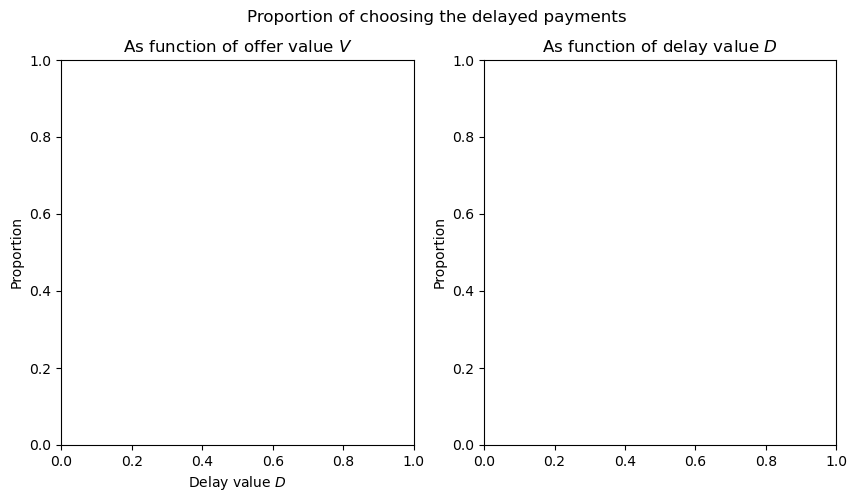

In [13]:
# YOUR CODE HERE
fig, axis = plt.subplots(ncols=2,figsize=(10,5))
plt.suptitle('Proportion of choosing the delayed payments')
axis[0].set_title('As function of offer value $V$')
axis[1].set_title('As function of delay value $D$')
axis[0].set_xlabel('Offer value $V$')
axis[0].set_xlabel('Delay value $D$')
axis[0].set_ylabel('Proportion')
axis[1].set_ylabel('Proportion')
plt.savefig("PS6_Q1_1A.png")

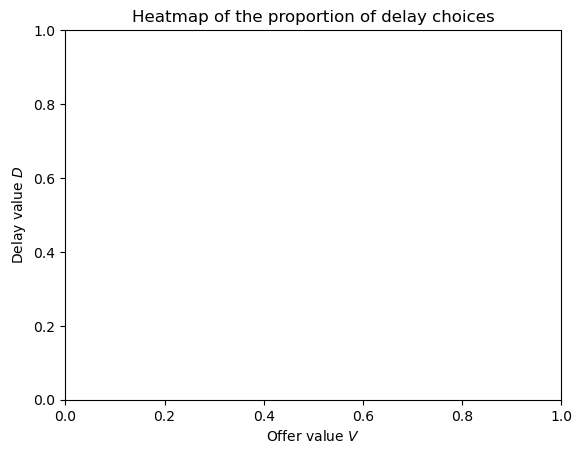

In [15]:
# YOUR CODE HERE
fig, axis = plt.subplots()

axis.set_title('Heatmap of the proportion of delay choices')
axis.set_xlabel('Offer value $V$')
axis.set_ylabel('Delay value $D$')
plt.savefig("PS6_Q1_1B.png")

## Q1.2 Individual differences [5pts, SOLO]

    
Different subjects can behave very differently in this type of experiments, so let's look at each subject individually. 
    
To do so, make the same heatmap as you just did in Q1.1B for each subject instead of all of them together. In 10 subplots (one per subject) of the same figure, plot each subject's behavior as a heatmap where the x-axis is the offer value $V$, the y-axis is the delay value $D$, and the colors indicate the probability of accepting the delayed offer given $V$ and $D$, $P(delay|V,D)$.
    
You will want to create an `individual_behavior` list for each of the 10 participants, each element of which is a 6 × 6 `np.array` that contains each participant's $P(delay|V,D)$. We will need this list later when comparing people's behavior with model predictions.
    
You **MUST** follow the plotting instructions below to get full credit:    
- Use (30, 10) as your parent figure size (`figsize=[30, 10]`)
- Arrange 10 subplots in a 2 (rows) $\times$ 5 (columns) grid
- Include a colorbar in each subplot
- Title each subplot using the corresponding subject ID (e.g., "0", "1", etc.)
- Label all x- and y-axes in the subplots and title your parent figure using the function `plt.suptitle()`
    
Upload your figure to Gradescope as as <code>PS6_Q1_2.png</code>.      
            


In [ ]:
figure, axis = plt.subplots(2, 5, figsize=[30, 10])

# YOUR CODE HERE
plt.tight_layout()
plt.savefig("PS6_Q1_2.png")


## Q1.3 Individual differences [3pts, SOLO]


<li>How does the behavior of subject 4 compare to the behavior of subject 6? Explain in <strong>one sentence</strong>. </li>
<li>How does the behavior of subject 1 compare to the behavior of subject 8? Explain in <strong>one sentence</strong>. </li>




YOUR ANSWER HERE


## Q2 Modeling the data

We will use hyperbolic discounting to model the data. As a reminder, the model assumes that the non-delayed offer of $V_0 =20$ is compared to a subjective value offer of $V_1 = \frac{V}{1+kD}$, which is a function of the offer value $V$ and delay value $D$, parameterized by the degree of discounting $k$.

Then, we assume that subjects choose between delayed payoff ($1$) or immediate payoff ($0$) according to a softmax decision rule: $P(delay) = \frac{1}{1+exp(\beta (V_0 - V_1))}$. This formula gives you the likelihood of an observed choice given A) the chosen model, B) the offer value $V$ and the delay $D$, as well as C) parameters $k$ (discount factor) and $\beta$ (noise parameter). To avoid numerical issues where the probability is $0$, **we will use a slightly modified version of the original equation**: 

$$P(delay) = \epsilon \cdot \frac{1}{2} + (1-\epsilon) \cdot \frac{1}{1+exp(\beta \cdot(V_0 - V_1))},$$ 

where $\epsilon = .0001$ is a very small value preventing 0 or 1 probabilities.


### Q2.1 Hyperbolic time discount likelihood [5pts, HELP]

Write a function called `likelihood_one_choice` that takes an observed choice $C$ (0 or 1), an $1 × 2$ offer vector ($[V, D]$), and a $1 × 2$ parameter vector ($[k, \beta]$), and returns the likelihood of choice $C$. Your function should first compute the subjective value of the new offer and then use it to compute the probability of making the choice. 


When you think your function is correct, run the next cell to plot the likelihood for choosing the delayed offer ($C=1$) multiple values of $k$, and upload your figure in Gradescope as `PS6_Q2_1.png`.

In [41]:
import math

def likelihood_one_choice(C, offer, parameters):
    """
    Returns the likelihood of choice C give C, the offer ([V, D]), 
    and parameters ([k, beta]) in the softmax choice model.
    
    Parameters
    ----------
    
    C: integer
        Observed choice (either 0 or 1)
    offer : NumPy array of shape (2,)
        Combination of offer value and delay 
    parameters: NumPy array of shape (2,)
        Parameter values (k and beta)
 
    Returns
    -------
    a float corresponding to the probability of C 

    """

    V = offer[0]
    D = offer[1]
    k = parameters[0]
    beta = parameters[1]
    eps = 0.0001

    # YOUR CODE HERE
    v1 = V / (1 + k*D)
    if C == 1:
        return (eps/2) + (1-eps) * (1/(1+math.exp(beta*(20-v1))))
    elif C == 0:
        return 1 - ((eps/2) + (1-eps) * (1/(1+math.exp(beta*(20-v1)))))

In [42]:
# (optional) Add your own test cases

Check if likelihood_one_choice computes the correct values:

In [43]:
likelihood_one_choice(0, np.array([100, 1]), np.array([1, 1]))

5.000000009347527e-05

In [45]:
from numpy.testing import assert_allclose

assert_allclose(likelihood_one_choice(1, np.array([100, 1]), np.array([1, 0])), 0.5)
assert_allclose(
    likelihood_one_choice(1, np.array([100, 1]), np.array([1, 1])), 0.9999499999999065
)
assert_allclose(
    likelihood_one_choice(0, np.array([100, 1]), np.array([1, 1])),
    5.000000009347527e-05,
)
assert_allclose(
    likelihood_one_choice(1, np.array([60, 30]), np.array([0.1, 0.5])),
    0.07590059420324143,
)

print("Success!")

Success!


Plot for Q3.1 and upload the figure to gradescope:

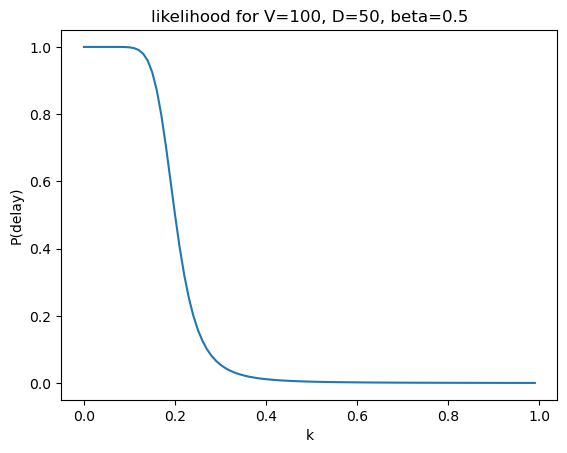

In [46]:
offer = np.array([100, 20])
beta = 0.5

ks = np.arange(0, 1, 0.01)
ls = np.empty(len(ks))

for i, k in enumerate(ks):
    ls[i] = likelihood_one_choice(1, offer, np.array([k, beta]))


figure, axis = plt.subplots()
axis.plot(ks, ls)
axis.set_xlabel("k")
axis.set_ylabel("P(delay)")
axis.set_title("likelihood for V=100, D=50, beta=0.5")

figure.savefig("PS6_Q2_1.png")


### Q2.2 Hyperbolic time discount likelihood - multiple trials [2pts, SOLO]

Implement the function `log_likelihood_choice` that takes an $n × 10$ array of observed choices, an $n × 2$ offer array, and a $1 × 2$ parameter vector ($[k, \beta]$), and returns the log-likelihood of the given sequence of $n × 10$ choices. We assume that all choices are independent from one another such that the log-likelihood of the sequence is equal to the sum of the log-likelihood of each choice independently. Here, we take the sum of the log-likelihoods because it is equivalent to taking the log of the product of the likelihoods. 

When you think your function is correct, run the next cell to plot the log-likelihood for multiple values of $\beta$, and upload your figure in Gradescope as `PS6_Q2_2.png`.

In [60]:
def log_likelihood_choices(choices, offers, parameters):   
    """
    Returns the log-likelihood of the sequence of choices, given an array of choices, 
    an array of corresponding offers, and parameters ([k, beta]) in the softmax choice model.
    
    Parameters
    ----------
    
    choices: NumPy array of shape (n, 10)
        A sequence of choices made by participants
    offer: NumPy array of shape (n, 2)
        A sequence of offers upon which choices were based
    parameters: NumPy array of shape (2,)
        Parameter values in the softmax function 
 
    Returns
    -------
    a float corresponding to the log-likelihood of the given sequence of choices 

    """

    #YOUR CODE HERE
    llik = 0
    for choice, offer in zip(choices,offers):
        for c in choice:
            llik += math.log(likelihood_one_choice(c, offer, parameters))
    return llik

In [61]:
from numpy.testing import assert_allclose

data = np.load("TimeDiscountExperiment.npz")
offers = data["offers"]
choices = data["choices"]


assert_allclose(
    log_likelihood_choices(choices, offers, np.array([0, 0.5])), -8217.927553085532
)
assert_allclose(
    log_likelihood_choices(choices, offers, np.array([0, 0])), -2495.329850015794
)
assert_allclose(
    log_likelihood_choices(choices, offers, np.array([0.2, 0.1])), -1663.772256824346
)


print("Success!")

Success!


In [62]:
# (optional) Add your own test cases here

Make the plot and upload it to gradescope:

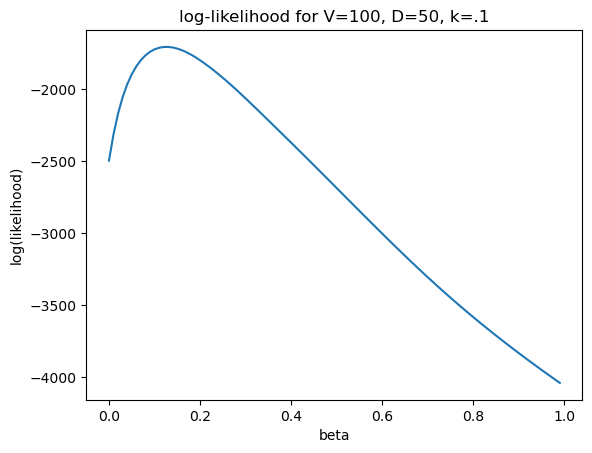

In [63]:
k = 0.1

bs = np.arange(0, 1, 0.01)
ls = np.empty(len(bs))

for i, b in enumerate(bs):
    ls[i] = log_likelihood_choices(choices, offers, np.array([k, b]))


figure, axis = plt.subplots()
axis.plot(bs, ls)
axis.set_xlabel("beta")
axis.set_ylabel("log(likelihood)")
axis.set_title("log-likelihood for V=100, D=50, k=.1")

figure.savefig("PS6_Q2_2.png")

## Q3 Fitting the parameters

Now, we are going to use the likelihood function to find the parameters that best fit each subject's choice data.

### Q3.1 Maximum likelihood estimation [5pts, HELP]

We are going to use [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search_2) to find the $k$ and the $\beta$ parameter values that maximize each subject's log-likelihood of choices. The "grid" consists of exhaustive combinations of possible $k$ and $\beta$ values, which you can use the provided arrays `ks` and `bs` to generate.
    
1. In 10 subplots (one per subject), plot the log-likelihood as a heatmap where the x-axis is $\beta$ and the y-axis is $k$. 
    
2. Apart from generating the heatmaps, in each subplot, you must also find the $k$ and the $\beta$ values that provide the maximium log-likelihood and then use a red dot to mark this position on that heatmap. Upload your figure in Gradescope as `PS6_Q3_1.png`.
    
You **MUST** follow the plotting instructions below to get full credit:    
- Use (30, 10) as your parent figure size (`figsize=[30, 10]`)
- Arrange 10 subplots in a 2 (rows) $\times$ 5 (columns) grid
- Title each subplot using the corresponding participant ID (i.e., "0", "1", etc.)
- Include a colorbar for each heatmap
- Label all x- and y-axes in the subplots and title your parent figure using the function `plt.suptitle()`
    
2. Please store the values of $\beta$ and $k$ that generate the maximum log-likelihood for each subject as 1-D arrays `map_b` and `map_k`.


In [ ]:
ks = np.arange(0.01, 1, 0.01)
bs = np.arange(0.1, 1, 0.1)

figure, axis = plt.subplots(2, 5, figsize=[30, 10])

# YOUR CODE HERE

plt.tight_layout()
figure.savefig("PS6_Q3_1.png")

### Q3.2 Maximum likelihood parameters [5pts, SOLO]

The data we provided to you is not real participant data but simulated data. The true $k$ and $\beta$ values that were used to simulate each participant's data are provided below. In two subplots (one per parameter), you will plot the maximum likelihood estimates (MLEs) of each parameter (x-axis) against their true values (y-axis). One subplot will be comparing MLEs of $\beta$ against actual $\beta$ values and the other comparing MLEs of $k$ against actual $k$ values.
    
You **MUST** follow the plotting instructions below to get full credit:    
- Use (10, 5) as your parent figure size (`figsize=[10, 5]`)
- Arrange the 2 subplots in one row: $\beta$ on the left and $k$ on the right 
- Title each subplot using the corresponding parameter name (i.e., "beta", "k")
- Label all x- and y-axes in the subplots and title your parent figure 
- Add a unity line ($y=x$) in each subplot
  
1. Upload your figure in Gradescope as `PS6_Q3_2.png`. 
2. How well did you recover the true parameters? Write **one or two sentences** to comment on the results.



In [ ]:
true_k = data["true_k"]
true_beta = data["true_beta"]

# YOUR CODE HERE

plt.savefig("PS6_Q3_2.png")

## Q4 Simulating behavior using the model


### Q4.1 Simulating the model [5pts, SOLO]

Now, we want to simulate people's choices using the model with fitted parameters to 1) see how well the simulation matches the actual data and 2) make predictions for different offer or delay values. You will reuse your `likelihood_one_choice` function in the simulation.

    
In Q1.2, you saved each subject's aggregate data in a list called <code>individual_behavior</code>. Recall that each element in this list is a 6 × 6 array storing each subject's $P(delay|V,D)$ given each combination of $V$ and $D$. In Q3.1, you saved each subject's estimated $k$ value in `map_k` and estimated $\beta$ value in `map_b`. You will be using these data to generate a figure with 10 subplots (one per subject).
    
1. In each subplot, for each offer value $V$ (<b>as a separate line</b>), plot the model's predicted likelihood of accepting the delayed offer as a function of delay (please use increments of 1 ranging from 0 to 100 for delay). 
    
2. Then on top of these lines, for each offer (<b>use the same color as the corresponding line to mark the dots</b>), plot each subject's $P(delay|V,D)$ as a function of delay (please use the actual delay values, which takes one of 6 discrete values in `Ds`). 
    
If you do it right, the lines in #1 should be very close to the corresponding data points in #2.

You **MUST** follow the plotting instructions below to get full credit:    
- Use (30, 10) as your parent figure size (`figsize=[30, 10]`)
- Arrange 10 subplots in a 2 (rows) $\times$ 5 (columns) grid
- Title each subplot using the corresponding subject ID (i.e., "0", "1", etc.)
- Label all x- and y-axes in the subplots and title your parent figure 
- Include a legend for each offer value in the subplots
- Make sure you use the same color scheme for your lines in #1 and the dots in #2 (e.g., when $V = 21$, if the line in #1 is blue, then the dots in #2 should also be blue)

Upload your figure in Gradescope as `PS6_Q4_1.png`.     


In [ ]:
Vs = np.unique(offers[:, 0])
Dline = np.arange(min(Ds), max(Ds) + 1)
Nd = len(Dline)

# YOUR CODE HERE

plt.tight_layout()
plt.savefig("PS6_Q4_1.png")


### Q4.2 Interpretation [3pts, SOLO]

In **2-3 sentences**, explain how well does the model capture the experiment data and where any observed differences might have come from.

### Q4.3 Prediction [2pts, SOLO]

Enter a single integer in Gradescope for each question:
1. For subject 3 (index starts from 0), if you make a delayed offer of $\$50$, how many days should the delay be so that they will be equally likely to take this delayed offer vs. $\$20$ immediately? 
2. What about subject 4? 
3. What about subject 5? 



---
<div style="background-color: #c1f2a5">
    
# Part 2

In this problem set, we are going to learn to navigate a simple maze.
    
## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Unless we specify otherwise, make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
**Test cases are here to help you debug your code, but passing them successfully is not a guarantee that your code is correct.**
    
</div>

In [64]:
import matplotlib.pyplot as plt

We are going to learn to navigate a simple maze. In this maze, you have to make two successive left-right decisions (coded as left = 0, right = 1). The first takes you from state $s=0$ to states $s=1$ or $s=2$. The second decision takes you to states $3-6$, as pictured below.

![](Maze_JDS.png)

Taking a first step to S1 or S2 is costly (reward $=-1$), but can get you to a position to get reward (states 3 and 6 give you 4 and 10 points respectively, while states 4 and 5 give you -1 point). Your goal is to gain as many points as possible, so you should learn to select right-right, which will give you a total cumulated reward of $-1+10 = 9$.

In this problem set, we will try a few different algorithms to learn this, and see how they behave differently. 

Below, we provide the reward function and the transition function.
- $R[i,j]$ indicates what reward you obtain for selecting action $a_j$ in state $s_i$
- $T[i,j]$ indicates what state you will be in after you select action $a_j$ in state $s_i$

Test it out to make sure it's right!

In [66]:
R = np.array([[-1,-1],[4,-1],[-1,10]])
T = np.array([[1,2],[3,4],[5,6]])

## Q5 Softmax choice [2pts, HELP]

In Q5, you will:
- implement the `softmax` function according to the specifications below
- use the `softmax` function to figure out how much cumulative reward an agent can receive on average if they choose left or right randomly

As a reminder, here is the softmax equation: 
$$ P(a|s) = \frac{\exp \bigl(\beta \cdot Q(s,a) \bigr)}{\sum_i \exp \bigl(\beta \cdot Q(s,a_i) \bigr)}$$

To limit overflow issues, we recommend rewriting this equation like this:
$$ P(a|s) = \frac{1}{\sum_i \exp \bigl(\beta \cdot [Q(s,a_i) - Q(s,a)] \bigr)}$$

Make sure to implement the `softmax` function on your own, instead of using an existing softmax function from a library or package. Check that your `softmax` function is correct with the tests, and report in gradescope the output of the last cell, where we've provided code for an agent that doesn't learn and just picks left or right based on their bias (which one they prefer). Make sure to read through the function, as it will help you code more intelligent agents later. 

In [ ]:
def softmax(beta,Qs):
    """
    Returns softmax probability of a choice.
    
    Parameters
    ----------
    beta : real number
        The softmax inverse temperature parameter
    Qs: a (1,n) numpy array of values
            
    Returns
    -------
    a: an integer in [0,n]
        a choice made with probability defined by softmax(betaQs)
    """


Check softmax computes the correct values (do not submit to gradescope):

In [ ]:
from numpy.testing import assert_allclose

assert_allclose(softmax(100,np.array([0,1])), 1.0)
assert_allclose(softmax(100,np.array([0,1,0])), 1.0)
assert_allclose(softmax(100,np.array([0,0,1])), 2.0)
assert_allclose(softmax(100,np.array([1,0,0,0])), 0.0)

print("Success!")

In [ ]:
# (optional) add your own tests


Run the cell below and copy the output into gradescope:

In [ ]:
def left_right_bias(beta,Qs,n_trials):
    """
    Returns average cumulated reward for a left-right bias agent.
    
    Parameters
    ----------
    beta : real number
        The softmax inverse temperature parameter
    Qs: a (1,n) numpy array of values
    n_trials: integer - number of trials to average over
            
    Returns
    -------
    float
        average cumulated reward
    """
    Cum_R = np.zeros(n_trials)
    for i in range(n_trials):
        # start at state 0
        initial_state = 0
        # make the first choice
        first_choice = softmax(beta,Qs)
        # see what reward that state gives, and what the next state is
        first_reward = R[initial_state,first_choice]
        next_state = T[initial_state,first_choice]
        # make a second choice
        second_choice = softmax(beta,Qs)
        # get reward
        second_reward =  R[next_state,second_choice]
        # store cumulated reward in this trial
        Cum_R[i] =first_reward + second_reward
    # return average cumulated reward.    
    return np.mean(Cum_R)
    
n_trials = 10000
beta = 0
Qs = np.zeros(2)
print('Random choice leads to average cumulated reward of: '+str(np.around(left_right_bias(beta,Qs,n_trials),decimals=2)))
beta = 5
Qs = np.array([.8,.5])
print('Random left-biased choice leads to average cumulated reward of: '+str(np.around(left_right_bias(beta,Qs,n_trials),decimals=2)))
beta = 5
Qs = np.array([.5,.8])
print('Random right-biased choice leads to average cumulated reward of: '+str(np.around(left_right_bias(beta,Qs,n_trials),decimals=2)))
beta = 50
Qs = np.array([.5,.8])
print('Near-greedy right-biased choice leads to average cumulated reward of: '+str(np.around(left_right_bias(beta,Qs,n_trials),decimals=2)))
    


## Q6 SARSA 

Now, we're going to code an agent that actually learns the values of different choices. 
We'll use the SARSA equation:
$$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \cdot \bigl(r_t + \gamma \cdot Q(s_{t+1},a_{t+1}) - Q(s_t,a_t) \bigr)$$

If there's no next state/action (i.e. when the algorithm reaches the end of the maze in any of states 3-6), the equation is simply: 
$$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \cdot \bigl(r_t  - Q(s_t,a_t) \bigr)$$


### Q6.1 SARSA Update [3pts, HELP] 
Implement the `sarsa` function below that takes the learning rate parameter $\alpha$, the discount factor $\gamma$; the Q-value table (a (3,2) np array); as well as a sequence of two successive states, two successive actions, and two successive outcomes (rewards) describing one path through the maze. The function should return the updated Q-value table for states $0, 1, 2$ and actions $0, 1$.

Copy and paste your code in gradescope.

In [ ]:
def sarsa(alpha, gamma,Q,s,a,r):
    """
    Returns updated Q-table.
    
    Parameters
    ----------
    alpha : real number
        The learning rate parameter
    gamma : real number
        The discount parameter
    Q: a (3,2) numpy array of values for states (0,1,2) and actions (0,1)
            
    Returns
    -------
    Q: a (3,2) numpy array of updated values for states (0,1,2) and actions (0,1)
    """
    
    
    #YOUR CODE HERE 


Check `sarsa` computes the correct values (do not report in gradescope): 

In [ ]:
from numpy.testing import assert_allclose

s = np.array([0,1]).astype(int)
a = np.zeros(2).astype(int)
r = np.array([-1,4]).astype(int)

alpha = .1
gamma=.9
assert_allclose(sarsa(alpha, gamma,0.5*np.ones([3,2]),s,a,r), np.array([[0.395,0.5],[0.85,0.5],[0.5,0.5]]))
a = np.ones(2).astype(int)
assert_allclose(sarsa(alpha, gamma,0.5*np.ones([3,2]),s,a,r), np.array([[0.5,0.395],[0.5,0.85],[0.5,0.5]]))
s = np.array([0,2]).astype(int)
assert_allclose(sarsa(alpha, gamma,0.5*np.ones([3,2]),s,a,r), np.array([[0.5,0.395],[0.5,0.5],[0.5,0.85]]))
alpha = .2
assert_allclose(sarsa(alpha, gamma,0.5*np.ones([3,2]),s,a,r), np.array([[0.5,0.29],[0.5,0.5],[0.5,1.2]]))
Q= sarsa(alpha, gamma,0.5*np.ones([3,2]),s,a,r)
gamma=.75
assert_allclose(sarsa(alpha, gamma,Q,s,a,r), np.array([[0.5,0.212],[0.5,0.5],[0.5,1.76]]))

print("Success!")

In [ ]:
# (optional) add your own test cases


### Q6.2 One trial SARSA [5pts, SOLO] 

Now, use the `sarsa` function you wrote as well as the `softmax` function you wrote to complete the function `onetrial_sarsa` below. This function should navigate one path through the maze, and return the two actions and rewards experienced, as well as the updated Q-values. Remember that the agent uses `softmax` to choose an action and `sarsa` to update the learned Q-values. Hint: you can use the structure of the provided `left_right_bias` function as a template for walking through the maze (taking transitions based on the selected action and observing the next state and reward/outcome). 

Upload the figure produced by the last cell. Due to the inherent randomness in the process, make sure to try plotting multiple times and upload the version of the figure that makes the most sense to you.

In [ ]:
def onetrial_sarsa(parameters,Q,R,T):
    """
    Returns updated Q-table.
    
    Input
    ----------
    parameters : (1,3) numpy array
        model parameters (beta, alpha, gamma)
    Q: a (3,2) numpy array of values for states (0,1,2) and actions (0,1)
    R: reward function (3,2) numpy array
    T: transition function (3,2) numpay array
            
    Returns
    -------
    Q: (3,2) numpy array of updated Q-values
    a: a (1,2) numpy array of the sequence of two choices
    r: a (1,2) numpy array of the sequence of two rewards.
    """
    #YOUR CODE HERE
    
    

In [ ]:
# (optional) add your own test cases



Run the cell below and submit the figure in gradescope:

In [ ]:
# Plotting the results 

R = np.array([[-1,-1],[4,-1],[-1,10]])
T = np.array([[1,2],[3,4],[5,6]])


nTrials = 100
Qs = np.empty((6,nTrials))
Q = np.array([[.5,.5],[.5,.5],[.5,.5]])
beta = 5
alpha = .1
gamma = 1
parameters = np.array([beta,alpha,gamma])

for t in range(nTrials):
    newQ,a,r=onetrial_sarsa(parameters,Q,R,T)
    Qs[:,t] = np.ndarray.flatten(newQ)
    
figure, axis = plt.subplots()
for i in range(6):
    axis.plot(Qs[i,:])
    
axis.legend(['Q(S0,A0)','Q(S0,A1)','Q(S1,A0)','Q(S1,A1)','Q(S2,A0)','Q(S2,A1)'])
plt.title('One trial SARSA')
plt.xlabel('Trials')
plt.ylabel('Value')

plt.savefig('PS6_Q6_2.png')

## Q7 Performance

Now, we'll run multiple (100) simulations, and see what the final Q-values are. Use the provided parameter values (50 trials, beta=5, alpha=0.1, gamma=1). Make sure to randomly re-initialize your Q-values for each simulation! 


### Q7.1 Plot final Q-values [5pts, SOLO]
In three subplots in the same parent figure, plot scatterplots of a) $Q(s_0,a_0)$ vs. $Q(s_0,a_1)$ b) $Q(s_0,a_1)$ vs. $Q(s_1,a_0)$ and c) $Q(s_0,a_1)$ vs. $Q(s_2,a_1)$, with the former on the x-axis and the latter on the y-axis.

To receive full credit, you **MUST** follow the plotting instructions below to get full credit:    
- Use (10, 3) as your parent figure size (`figsize=[10, 3]`)
- Arrange the 3 subplots in one row in the order of a), b), and c).
- Title each subplot, label the x- and y-axes, and set appropriate x- and y-limits
- Title the parent figure properly using `plt.suptitle()`

Upload your graph to Gradescope.


In [ ]:
R = np.array([[-1,-1],[4,-1],[-1,10]])
T = np.array([[1,2],[3,4],[5,6]])


nTrials = 50
niterations = 100
Qs = np.empty((6,niterations))
beta = 5
alpha = .1
gamma = 1
parameters = np.array([beta,alpha,gamma])

## YOUR CODE HERE

plt.savefig('PS6_Q7_1.png')

### Q7.2 Interpretation [3pts, HELP]

If you got the previous function right, you should observe a small cluster of simulations that end up with different Q-values than the main cluster of simulations, at the same time for more than one state-action pair. Explain in gradescope what happened in those simulations in **2-3 sentences**.

## Q8 Parameter effects

In this part, we will explore the roles of various parameters on learning performance. To summarize performance, we will compute the average cumulative reward obtained at each trial (It should be a number between $-2$, the minimum reward over two steps, and $10-1=9$, the maximum cumulative reward over two steps). 

Implement the function `cumulative_outcome` (the outcome is the reward) below.

In [ ]:
def cumulative_outcome(parameters,R,T,nTrials,niterations):
    """
    Returns average cumulative earnings.
    
    Input
    ----------
    parameters : (1,3) numpy array
        model parameters (beta, alpha, gamma)
    R: reward function (3,2) numpy array
    T: transition function (3,2) numpay array
    nTrials: integer (number of learning trials in an iteration)
    niterations: number of iterations of the simulation
            
    Returns
    -------
    average cumulated reward for two steps, over trials and simulations.
    """
    #YOUR CODE HERE


    

### Q8.1 Effect of beta [3pts, SOLO]

To investigate the effect of beta on learning performance, use $\gamma = 0.5$. In one figure, use two line plots to plot performance as a function of beta values between 1 and 20 in increments of 2, separately for $\alpha = 0.1$ and $\alpha=0.3$. 

To receive full credit, you **MUST** follow the plotting instructions below to get full credit:    
- Add legends to indicate the identities of the two lines
- Title the plot, label the x- and y-axes, and set appropriate x- and y-limits

Upload your graph to Gradescope.

In [ ]:
nTrials=20
niterations=1000

gamma=0.5


betaline=np.arange(1,20,2)
figure, axis = plt.subplots()

alpha=.1
R_beta = np.empty(len(betaline))

##YOUR CODE HERE

plt.savefig('PS6_Q8_1.png')

### Q8.2 Effect of beta - interpretation [4pts, HELP]
In **2-3 sentences**, explain:
- how beta affects performance for both values of alpha
- why that is
- how the effect of beta on performance differs between both values of alpha

If your graph is wrong/you don't have a graph, you can still try to explain in general terms what effects beta could have on performance. 

### Q8.3 Effect of alpha [3pts, SOLO]

To investigate the effect of alpha on performance, use $\gamma = 0.5$. In one figure, use two line plots to plot performance as a function of alpha values ranging from 0.05 to 1 in increments of 0.05, for $\beta = 1$ and $\beta = 5$. 

To receive full credit, you **MUST** follow the plotting instructions below to get full credit:    
- Add legends to indicate the identities of the two lines
- Title the plot, label the x- and y-axes, and set appropriate x- and y-limits

Upload your figure in gradescope. 

In [ ]:
nTrials=20
niterations=1000

gamma=0.5
alphaline=np.arange(.05,1,.05)


##YOUR CODE HERE


plt.savefig('PS6_Q8_3.png')

### Q8.4 Effect of alpha - interpretation [4pts, HELP]

In **2-3 sentences**, explain how alpha affects performance for both values of beta, why that is, and how the effect of alpha on performance differs between both values of beta. 

If your graph is wrong/you don't have a graph, you can still try to explain in general terms what effects $\alpha$ could have on performance. 

## 9 Planning 
Now, we will try model-based reinforcement learning.
In this algorithm, the agent knows the reward function and the transition function. They use it to plan ahead by mentally simulating walking through all possible paths in the maze and evaluating the cumulative reward for each path. The agent compares the cumulative reward values between different paths to choose one of the four possible paths, via a softmax function.


### 9.1 Implementing planning [3pts, HELP]
Implement the `onetrial_planning` function below. Your function should:
- compute the cumulative reward for each path of the tree and return it 
- choose between the four possible paths by applying the softmax function to the cumulative rewards of all paths
- return the sequence of two actions and two rewards obtained corresponding to the path chosen

Run your function for 1000 times with $\beta=0.5$ and $\gamma=0.5$, and make a bar plot showing the proportion of times each of the four paths was chosen. 

To receive full credit, you **MUST** follow the plotting instructions below to get full credit:    
- Use (6, 4) as your figure size (`figsize=[6, 4]`)
- Title the plot 
- Label the x- and y-axes
- Set the y-limits to 0 and 1

Upload your figure in gradescope. 

In [ ]:
def onetrial_planning(parameters,R,T):
    """
    Runs one trial of planning.
    
    Input
    ----------
    parameters : (1,2) numpy array
        model parameters (beta, gamma)
    R: reward function (3,2) numpy array
    T: transition function (3,2) numpay array
            
    Returns
    -------
    Q: (1,4) numpy array of cumulative reward for each path
    a: (1,2) numpy array of the sequence of two choices selected
    r: (1,2) numpy array of the sequence of two rewards obtained.
    """
    # YOUR CODE HERE

In [ ]:
# (optional) add your own tests

Check `onetrial_planning` computes the correct values (do not submit in gradescope): 

In [ ]:
from numpy.testing import assert_allclose

assert_allclose(onetrial_planning(np.array([1,1]),np.array([[-1,-1],[4,-1],[-1,10]]),T)[0], np.array([3,-2,-2,9]))
assert_allclose(onetrial_planning(np.array([1,.5]),np.array([[-1,-1],[4,-1],[-1,10]]),T)[0], np.array([1,-1.5,-1.5,4]))

print("Success!")

In [ ]:
# YOUR CODE HERE   
    
plt.savefig('PS6_Q9_1.png')

### 9.2 Comparing planning to learning [5pts, HELP]
We're going to compare SARSA (model-free) and model-based planning. Planning has more information about state transitions, so it should perform better (i.e. get more cumulative reward). But it should also be more computationally expensive. We'll measure that by the time it takes the code to run.

Run both SARSA and model-based planning for 1000 iterations of 100 trials each. In two subplots, make bar plots to show a) the cumulative reward after 100 trials averaged over all iterations (y-axis) for each model (x-axis), and b) the duration in miliseconds of the computation for each model averaged over 1000 iterations. [HINT: use the `time` package. You can use `time.time()` to get a timestamp of the current time in seconds.]

You **MUST** follow the plotting instructions below to get full credit:    
- Use (10, 5) as your parent figure size (`figsize=[10, 5]`)
- Arrange the 2 subplots in one row: a) on the left and b) on the right 
- Title each subplot 
- Label all x- and y-axes in the subplots and title your parent figure using `plt.suptitle()`
  
Submit the following in gradescope:
1. Upload your figure in Gradescope as `PS6_Q3_2.png`. 
2. Write **one or two sentences** to describe whether the results match the predictions.

In [ ]:
import time

# YOUR CODE HERE
plt.tight_layout()
plt.savefig('PS6_Q9_2.png')

<div style="background-color: #c1f2a5">

# Submission

    
When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS6.
- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="../img/py_exporting_instructions.png" width="500"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS6-code.
    
</div>        




</div>
